**<div class="alert alert-block alert-info"><h1 style="text-align:center;color:black"> Sign Language Recognition Using Machine Learning 📷  </h1> </div>**



This project explores the application of machine learning algorithms for recognizing American Sign Language (ASL) letters using the Sign Language MNIST dataset. Our goal is to identify effective methods for sign language recognition that could contribute to developing assistive technologies for the mute and hard of hearing, while also extending the capabilities of machine learning in interpreting complex visual data without relying on extensive computational resources.


<div class="alert alert-block alert-warning"><h2 style="text-align:Center;color:black">Table of Content </h2> </div>


1. [Importing Essential Libraries📖](#3)
1. [Train Test Split](#6)
1. [Data Exploration📊](#5)
1. [Data Preprocessing 🛠️](#7)
1. [Data Augumentation](#7)
1. [Fitting our Model ⚙️](#10)
   1.   [Support Vector Machine (SVM)](#)
   2.   [k-Nearest Neighbors (K-NN)](#)
   3.   [Random Forests](#)
   4.   [CNN](#)
1. [Evaluation](#15)
1. [Plot Result](#16)


#Importing Essential Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import seaborn as sns
import plotly.express as px

In [2]:
!pip install -q kaggle

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [4]:
!kaggle datasets download -d datamunge/sign-language-mnist

Dataset URL: https://www.kaggle.com/datasets/datamunge/sign-language-mnist
License(s): CC0-1.0
 78% 49.0M/62.6M [00:00<00:00, 49.4MB/s]
100% 62.6M/62.6M [00:00<00:00, 68.8MB/s]


In [5]:
!unzip -q sign-language-mnist

#Train and test split

In [46]:
train_data = pd.read_csv('/content/sign_mnist_train.csv')
test_data = pd.read_csv('/content/sign_mnist_test.csv')

#Data Exploration (EDA)

In [7]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [9]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
label,27455.0,12.318813,7.287552,0.0,6.0,13.0,19.0,24.0
pixel1,27455.0,145.419377,41.358555,0.0,121.0,150.0,174.0,255.0
pixel2,27455.0,148.500273,39.942152,0.0,126.0,153.0,176.0,255.0
pixel3,27455.0,151.247714,39.056286,0.0,130.0,156.0,178.0,255.0
pixel4,27455.0,153.546531,38.595247,0.0,133.0,158.0,179.0,255.0
...,...,...,...,...,...,...,...,...
pixel780,27455.0,162.736696,63.444008,0.0,125.0,184.0,207.0,255.0
pixel781,27455.0,162.906137,63.509210,0.0,128.0,184.0,207.0,255.0
pixel782,27455.0,161.966454,63.298721,0.0,128.0,182.0,206.0,255.0
pixel783,27455.0,161.137898,63.610415,0.0,128.0,182.0,204.0,255.0


**Show Correlation between each feature and the target class**

In [10]:
correlation_matrix = train_data.corr()

target_correlation = correlation_matrix['label']
target_correlation

label       1.000000
pixel1     -0.136272
pixel2     -0.129994
pixel3     -0.113213
pixel4     -0.104100
              ...   
pixel780   -0.047260
pixel781   -0.039771
pixel782   -0.030824
pixel783   -0.021529
pixel784   -0.006100
Name: label, Length: 785, dtype: float64

In [11]:
train_data.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [12]:
fig = px.histogram(train_data, x='label',color='label', title='Distribution of Labels in Training Dataset')

fig.update_layout(
    xaxis_title='Label',
    yaxis_title='Count',
    showlegend=False,
    bargroupgap=0.1,
)

fig.show()

In [13]:
fig = px.histogram(test_data, x='label',color='label', title='Distribution of Labels in Testing Dataset')

fig.update_layout(
    xaxis_title='Label',
    yaxis_title='Count',
    showlegend=False,
    bargroupgap=0.1,
)

fig.show()

**Visualize All The Images**

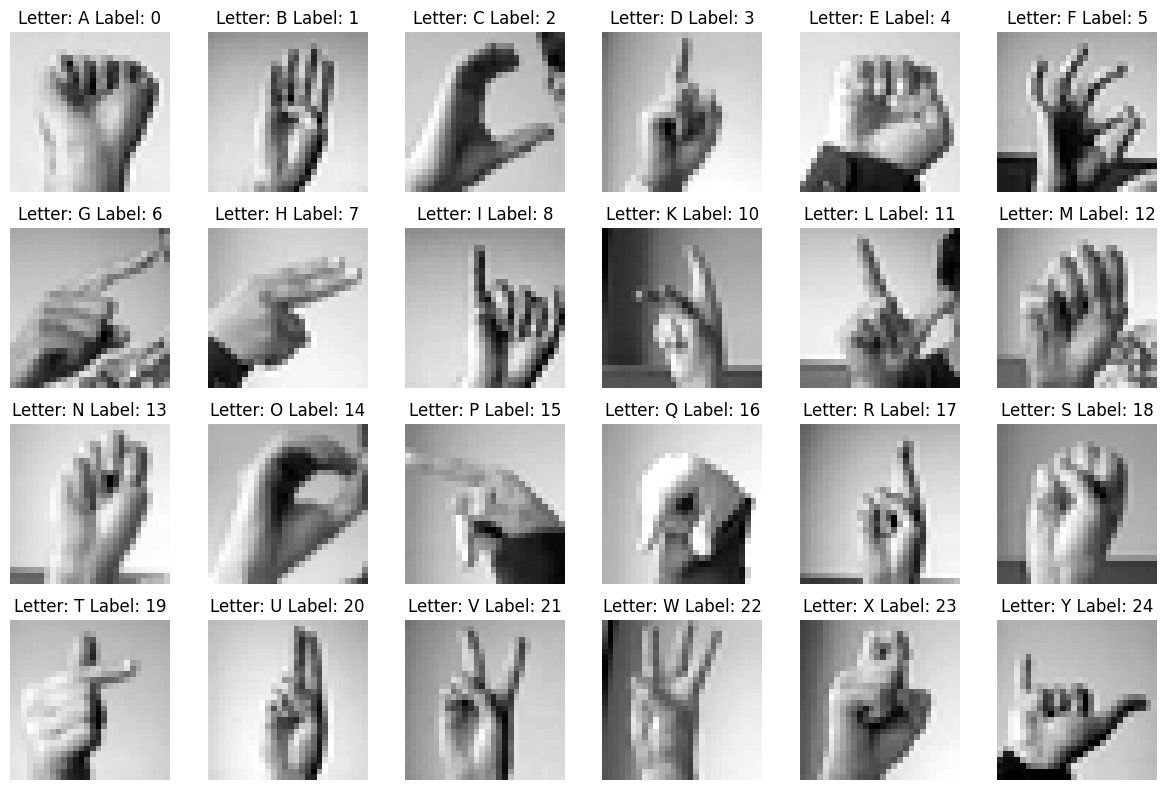

In [14]:
# Group the dataframe by the 'label' column
label_groups = train_data.groupby('label')

# Iterate over each label group and display one image
fig, axs = plt.subplots(4, 6, figsize=(12, 8))

for i, (label, group) in enumerate(label_groups):
    # Get the first image from the group
    image = group.iloc[0, 1:].values.reshape(28, 28)

    # Calculate the subplot index
    row = i // 6
    col = i % 6

    # Convert label to integer and add 65 to get ASCII value
    ascii_value = int(label) + 65

    # Display the image
    axs[row, col].imshow(image, cmap='gray')
    axs[row, col].set_title('Letter: '+ chr(ascii_value) + " Label: " + str(label))
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()

#Data Preprocessing

**Checking missing values**

In [15]:
train_data.isna().any().sum()

0

**Split X and Y**

In [47]:
X_train = train_data.drop('label', axis=1)
y_train = train_data['label']

X_test = test_data.drop('label', axis=1)
y_test = test_data['label']

In [17]:
print(y_train.value_counts())
print(y_test.value_counts())

label
17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
3     1196
14    1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: count, dtype: int64
label
4     498
7     436
1     432
12    394
6     348
15    347
21    346
24    332
0     331
10    331
2     310
13    291
8     288
23    267
20    266
19    248
5     247
14    246
18    246
3     245
11    209
22    206
16    164
17    144
Name: count, dtype: int64


**Converting the dataframe to numpy array type to be used while training the models.**

In [48]:
X_train = np.array(X_train, dtype='float32')
X_test = np.array(X_test, dtype='float32')
y_train = np.array(y_train, dtype='float32')
y_test = np.array(y_test, dtype='float32')

**Data Normalization**

In [49]:
X_train = X_train / 255.0
X_test = X_test / 255.0

#Fitting the Model (SVM)

In [20]:
svm_model = SVC(gamma = 0.1)
history = svm_model.fit(X_train, y_train)

#Model Evaluation

In [21]:
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

Accuracy: 84.33%


Before parameter tuning: 84.17%

After parameter tuning: 84.33%

gamma=0.1, C=1, kernel='rbf'

In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97       331
         1.0       1.00      0.91      0.95       432
         2.0       0.99      1.00      0.99       310
         3.0       0.89      1.00      0.94       245
         4.0       0.95      0.99      0.97       498
         5.0       0.87      0.91      0.89       247
         6.0       0.94      0.91      0.93       348
         7.0       0.99      0.92      0.96       436
         8.0       0.83      0.82      0.83       288
        10.0       0.77      0.69      0.73       331
        11.0       0.91      1.00      0.95       209
        12.0       0.86      0.76      0.81       394
        13.0       0.87      0.70      0.77       291
        14.0       0.98      0.95      0.96       246
        15.0       1.00      1.00      1.00       347
        16.0       0.77      1.00      0.87       164
        17.0       0.27      0.50      0.35       144
        18.0       0.74    

**Confusion matrix**

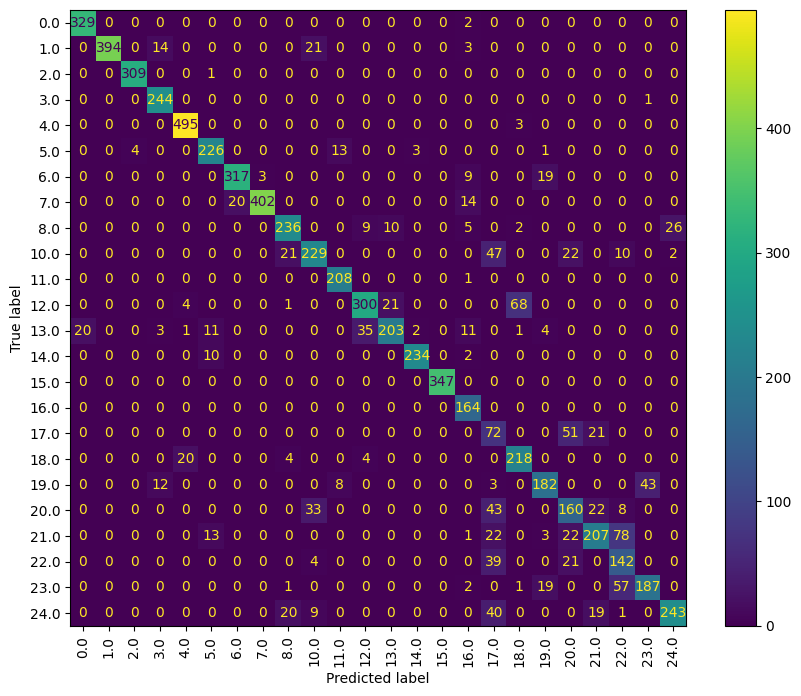

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Set the size of the figure and create axes
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the width and height as needed

ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                        y_pred=y_pred, xticks_rotation='vertical', ax=ax)
plt.show()

#Plot some predictions

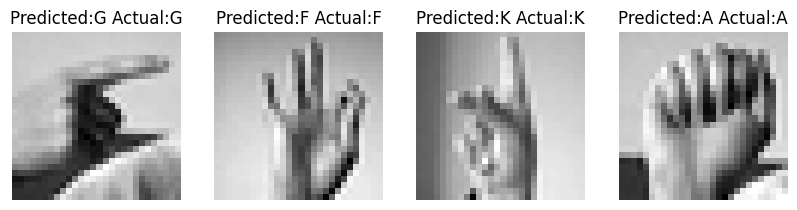

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(10, 3))
for i, ax in enumerate(axes.flat):
    img = X_test[i].reshape(28, 28)
    ax.imshow(img, cmap='gray')
    ax.set_title(f'Predicted:{chr(int(y_pred[i])+65)} Actual:{chr(int(y_test[i])+65)}')
    ax.axis('off')
plt.show()

#               --------------------------------------END Of SVM--------------------------------------

#K-NN Model

#Fitting and training the model (KNN)

In [23]:
knn_model = KNeighborsClassifier(n_neighbors=5, metric='cosine')
knn_model.fit(X_train, y_train)

KNeighborsClassifier(metric='cosine')

#Model Evaluation

In [24]:
y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

Accuracy: 82.11%


Before parameter tuning: 80.5%

After parameter tuning: 82.11% (n_neighbors=5, metric='cosine')

**Confusion matrix**

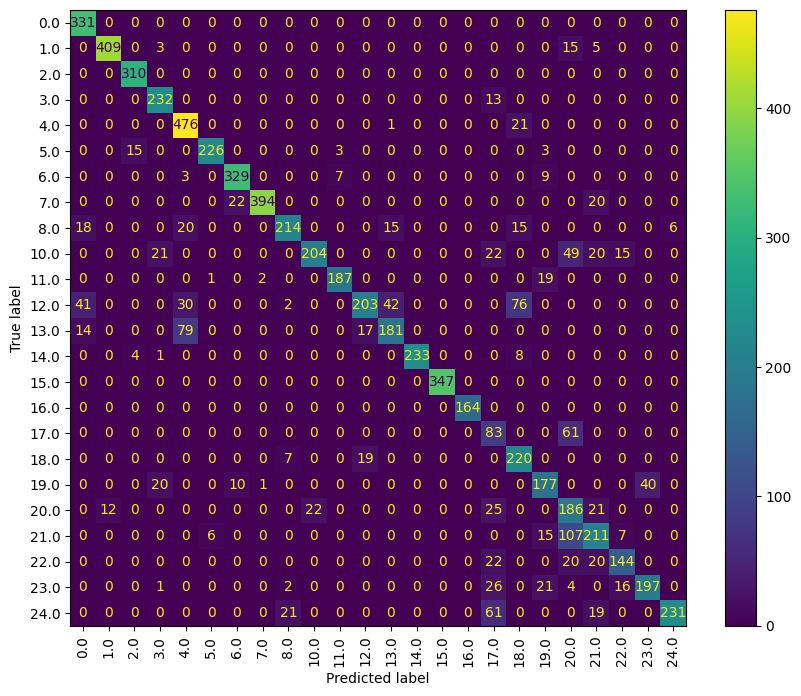

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay

# Set the size of the figure and create axes
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the width and height as needed

ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred, xticks_rotation='vertical', ax=ax)
plt.show()

In [27]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90       331
         1.0       0.97      0.95      0.96       432
         2.0       0.94      1.00      0.97       310
         3.0       0.83      0.95      0.89       245
         4.0       0.78      0.96      0.86       498
         5.0       0.97      0.91      0.94       247
         6.0       0.91      0.95      0.93       348
         7.0       0.99      0.90      0.95       436
         8.0       0.87      0.74      0.80       288
        10.0       0.90      0.62      0.73       331
        11.0       0.95      0.89      0.92       209
        12.0       0.85      0.52      0.64       394
        13.0       0.76      0.62      0.68       291
        14.0       1.00      0.95      0.97       246
        15.0       1.00      1.00      1.00       347
        16.0       1.00      1.00      1.00       164
        17.0       0.33      0.58      0.42       144
        18.0       0.65    

#Plot Some predictions

              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90       331
         1.0       0.97      0.95      0.96       432
         2.0       0.94      1.00      0.97       310
         3.0       0.83      0.95      0.89       245
         4.0       0.78      0.96      0.86       498
         5.0       0.97      0.91      0.94       247
         6.0       0.91      0.95      0.93       348
         7.0       0.99      0.90      0.95       436
         8.0       0.87      0.74      0.80       288
        10.0       0.90      0.62      0.73       331
        11.0       0.95      0.89      0.92       209
        12.0       0.85      0.52      0.64       394
        13.0       0.76      0.62      0.68       291
        14.0       1.00      0.95      0.97       246
        15.0       1.00      1.00      1.00       347
        16.0       1.00      1.00      1.00       164
        17.0       0.33      0.58      0.42       144
        18.0       0.65    

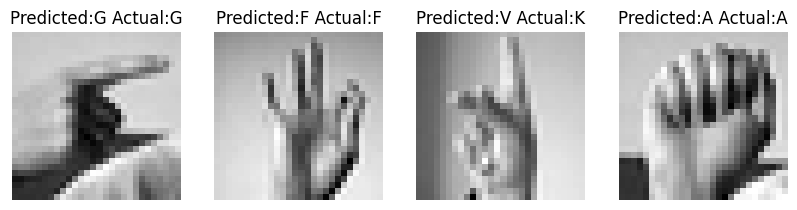

In [26]:

# Plot some predictions
fig, axes = plt.subplots(1, 4, figsize=(10, 3))
for i, ax in enumerate(axes.flat):
    img = X_test[i].reshape(28, 28)
    ax.imshow(img, cmap='gray')
    ax.set_title(f'Predicted:{chr(int(y_pred[i])+65)} Actual:{chr(int(y_test[i])+65)}')
    ax.axis('off')
plt.show()

#               --------------------------------------END Of KNN--------------------------------------

#Random Forest Classifier

#Fitting and training the Model

In [35]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

#Model Evaluation

In [36]:
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

Accuracy: 81.09%


Before parameter tuning: 81.09%

After parameter tuning: 82.93% (n_estimators=250, max_depth=30, max_features='log2')



**Confusion matrix**

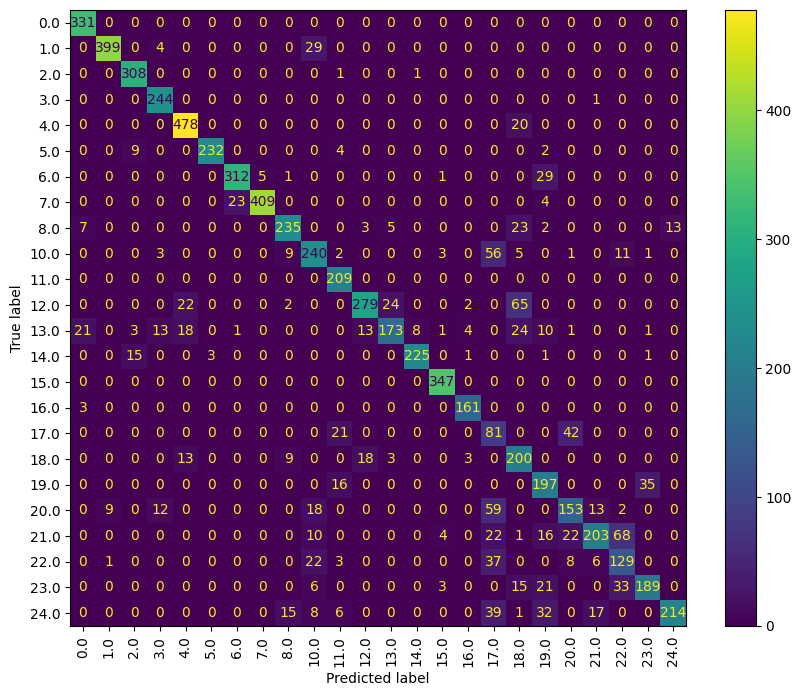

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay

# Set the size of the figure and create axes
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the width and height as needed

ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred, xticks_rotation='vertical', ax=ax)
plt.show()

In [33]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.96       331
         1.0       0.98      0.92      0.95       432
         2.0       0.92      0.99      0.96       310
         3.0       0.88      1.00      0.94       245
         4.0       0.90      0.96      0.93       498
         5.0       0.99      0.94      0.96       247
         6.0       0.93      0.90      0.91       348
         7.0       0.99      0.94      0.96       436
         8.0       0.87      0.82      0.84       288
        10.0       0.72      0.73      0.72       331
        11.0       0.80      1.00      0.89       209
        12.0       0.89      0.71      0.79       394
        13.0       0.84      0.59      0.70       291
        14.0       0.96      0.91      0.94       246
        15.0       0.97      1.00      0.98       347
        16.0       0.94      0.98      0.96       164
        17.0       0.28      0.56      0.37       144
        18.0       0.56    

#Plot Some Predictions

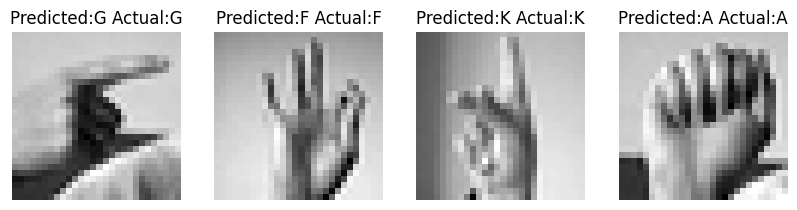

In [34]:
fig, axes = plt.subplots(1, 4, figsize=(10, 3))
for i, ax in enumerate(axes.flat):
    img = X_test[i].reshape(28, 28)
    ax.imshow(img, cmap='gray')
    ax.set_title(f'Predicted:{chr(int(y_pred[i])+65)} Actual:{chr(int(y_test[i])+65)}')
    ax.axis('off')
plt.show()

#               --------------END for Random Forest Classifier--------------

#Convolutional Neural Network

In [50]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [51]:
X_train.shape

(27455, 784)

**We need to reshape the input image**

In [52]:
x_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
x_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [53]:
x_train.shape

(27455, 28, 28, 1)

#Model Structure

In [54]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), input_shape = (28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), input_shape = (28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(units = 512, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 25, activation = 'softmax'))

#Train the Model

In [61]:
model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics =['accuracy'])
history = model.fit(x_train, y_train, batch_size = 512, epochs = 15, verbose = 1)

Epoch 1/15
54/54 [==============================] - 4s 18ms/step - loss: 0.6957 - accuracy: 0.7624
Epoch 2/15
54/54 [==============================] - 1s 16ms/step - loss: 0.5604 - accuracy: 0.8071
Epoch 3/15
54/54 [==============================] - 1s 17ms/step - loss: 0.4524 - accuracy: 0.8448
Epoch 4/15
54/54 [==============================] - 1s 19ms/step - loss: 0.3762 - accuracy: 0.8722
Epoch 5/15
54/54 [==============================] - 1s 13ms/step - loss: 0.3125 - accuracy: 0.8931
Epoch 6/15
54/54 [==============================] - 1s 13ms/step - loss: 0.2548 - accuracy: 0.9138
Epoch 7/15
54/54 [==============================] - 1s 13ms/step - loss: 0.2114 - accuracy: 0.9323
Epoch 8/15
54/54 [==============================] - 1s 13ms/step - loss: 0.1838 - accuracy: 0.9403
Epoch 9/15
54/54 [==============================] - 1s 13ms/step - loss: 0.1597 - accuracy: 0.9477
Epoch 10/15
54/54 [==============================] - 1s 14ms/step - loss: 0.1365 - accuracy: 0.9566
Epoch 11/

Text(0.5, 1.0, 'Accuracy evolution')

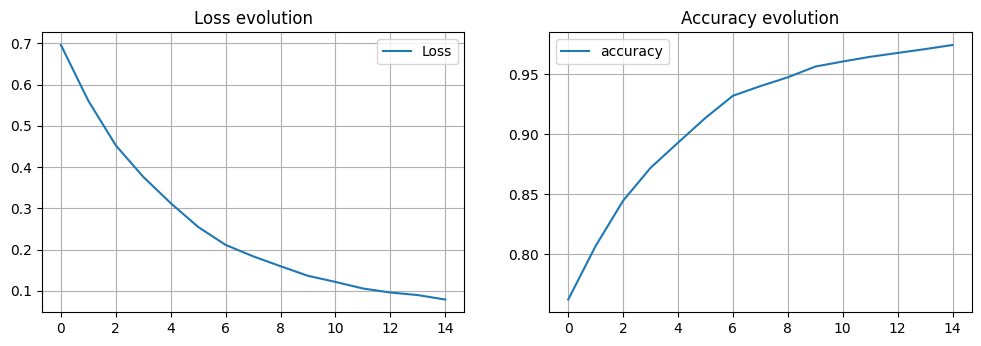

In [62]:
#Visualizing the training performance
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy evolution')

#Test the Model

In [63]:
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

225/225 [==============================] - 1s 2ms/step


In [64]:
#Classification accuracy
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, predicted_classes)
print('Accuracy Score = ',acc_score)

Accuracy Score =  0.9415783602900167


**Confusion matrix**

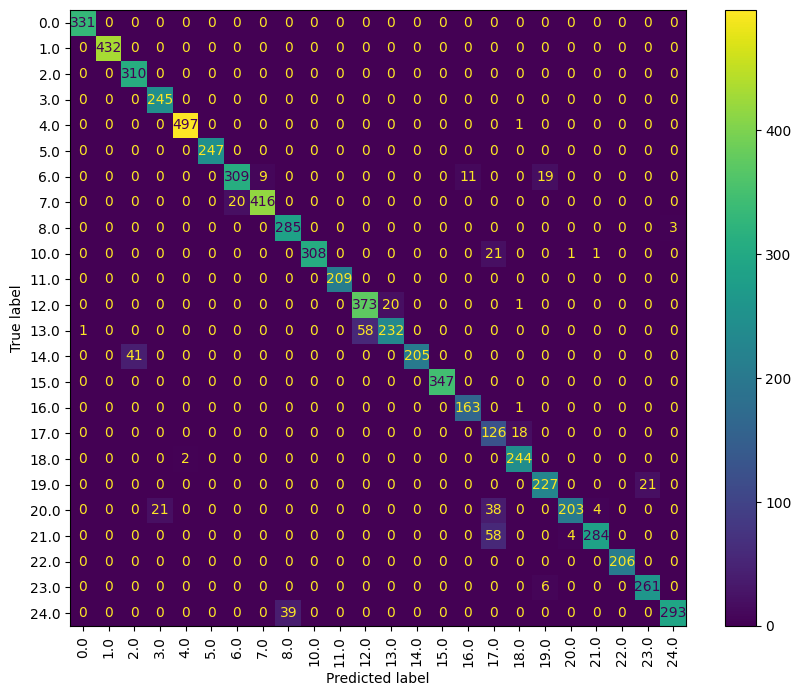

In [65]:
from sklearn.metrics import ConfusionMatrixDisplay

# Set the size of the figure and create axes
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the width and height as needed

ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=predicted_classes, xticks_rotation='vertical', ax=ax)
plt.show()

In [67]:
# Classification report
print(classification_report(y_test, predicted_classes))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       331
         1.0       1.00      1.00      1.00       432
         2.0       0.88      1.00      0.94       310
         3.0       0.92      1.00      0.96       245
         4.0       1.00      1.00      1.00       498
         5.0       1.00      1.00      1.00       247
         6.0       0.94      0.89      0.91       348
         7.0       0.98      0.95      0.97       436
         8.0       0.88      0.99      0.93       288
        10.0       1.00      0.93      0.96       331
        11.0       1.00      1.00      1.00       209
        12.0       0.87      0.95      0.90       394
        13.0       0.92      0.80      0.85       291
        14.0       1.00      0.83      0.91       246
        15.0       1.00      1.00      1.00       347
        16.0       0.94      0.99      0.96       164
        17.0       0.52      0.88      0.65       144
        18.0       0.92    

#               --------------------------------------END--------------------------------------